In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
train_dir = 'rps/'
valid_dir = 'rps-test-set/'

print('total training rock images :', len(os.listdir(train_dir + 'rock')))
print('total training paper images :', len(os.listdir(train_dir + 'paper')))
print('total training scissors images :', len(os.listdir(train_dir + 'scissors')))

print('total validation rock images :', len(os.listdir(valid_dir + 'rock')))
print('total validation paper images :', len(os.listdir(valid_dir + 'paper')))
print('total validation scissors images :', len(os.listdir(valid_dir + 'scissors')))

total training rock images : 840
total training paper images : 840
total training scissors images : 840
total validation rock images : 124
total validation paper images : 124
total validation scissors images : 124


In [3]:
train_rock_images = os.listdir(train_dir + 'rock')
train_paper_images = os.listdir(train_dir + 'paper')
train_scissors_images = os.listdir(train_dir + 'scissors')

names = {
    'rock' : train_rock_images,
    'paper' : train_paper_images,
    'scissors' : train_scissors_images
}

train_df = pd.DataFrame(names)

valid_rock_images = os.listdir(valid_dir + 'rock')
valid_paper_images = os.listdir(valid_dir + 'paper')
valid_scissors_images = os.listdir(valid_dir + 'scissors')

names = {
    'rock' : valid_rock_images,
    'paper' : valid_paper_images,
    'scissors' : valid_scissors_images
}

valid_df = pd.DataFrame(names)

In [4]:
train_df.head()

,rock,paper,scissors
0,rock01-000.png,paper01-000.png,scissors01-000.png
1,rock01-001.png,paper01-001.png,scissors01-001.png
2,rock01-002.png,paper01-002.png,scissors01-002.png
3,rock01-003.png,paper01-003.png,scissors01-003.png
4,rock01-004.png,paper01-004.png,scissors01-004.png


In [5]:
valid_df.head()

,rock,paper,scissors
0,testrock01-00.png,testpaper01-00.png,testscissors01-00.png
1,testrock01-01.png,testpaper01-01.png,testscissors01-01.png
2,testrock01-02.png,testpaper01-02.png,testscissors01-02.png
3,testrock01-03.png,testpaper01-03.png,testscissors01-03.png
4,testrock01-04.png,testpaper01-04.png,testscissors01-04.png


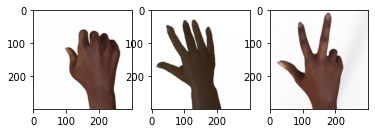

In [6]:
index = 200
fig, ax = plt.subplots(1, 3)
ax[0].imshow(cv2.cvtColor(cv2.imread(train_dir + 'rock/' + train_df.iloc[index]['rock']), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(cv2.imread(train_dir + 'paper/' + train_df.iloc[index]['paper']), cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(cv2.imread(train_dir + 'scissors/' + train_df.iloc[index]['scissors']), cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
img_size = 75
train_batch_size = 64
valid_batch_size = 32
epochs = 15
train_steps_per_epoch = len(train_df)*3//train_batch_size
valid_steps_per_epoch = len(valid_df)*3//valid_batch_size

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size,img_size), batch_size=train_batch_size, 
                                                    class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(img_size,img_size), 
                                                              batch_size=valid_batch_size, class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [9]:
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_size, img_size, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

In [10]:
model = get_model()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        1

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit_generator(train_generator, validation_data=valid_generator, steps_per_epoch=train_steps_per_epoch, 
                              validation_steps=valid_steps_per_epoch, epochs=epochs, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 39 steps, validate for 11 steps
Epoch 1/15
39/39 [==============================] - 7s 172ms/step - loss: 1.1036 - accuracy: 0.3616 - val_loss: 1.0952 - val_accuracy: 0.4602
Epoch 2/15
39/39 [==============================] - 6s 142ms/step - loss: 0.8786 - accuracy: 0.5794 - val_loss: 0.8004 - val_accuracy: 0.6591
Epoch 3/15
39/39 [==============================] - 5s 138ms/step - loss: 0.2868 - accuracy: 0.8937 - val_loss: 0.6472 - val_accuracy: 0.7585
Epoch 4/15
39/39 [==============================] - 5s 139ms/step - loss: 0.1107 - accuracy: 0.9650 - val_loss: 0.4451 - val_accuracy: 0.8778
Epoch 5/15
39/39 [==============================] - 6s 145ms/step - loss: 0.0631 - accuracy: 0.9768 - val_loss: 0.3832 - val_accuracy: 0.8977
Epoch 6/15
39/39 [==============================] - 5s 140ms/step - loss: 0.0493 - accuracy: 0.9833 - val_loss: 0.4535 - v

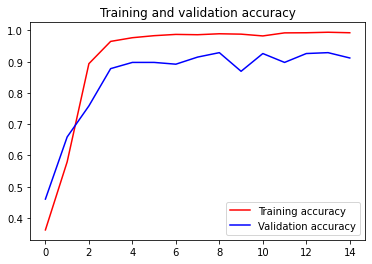

In [14]:
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [15]:
model.save('rock_paper_scissor.h5')